In [1]:
import pandas as pd 
import numpy as np  

import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [2]:
data = pd.read_csv("dataset/data.csv") 
data.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print(data.shape)

(299, 13)


In [4]:
data.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.isnull().sum().sum()

0

203
96


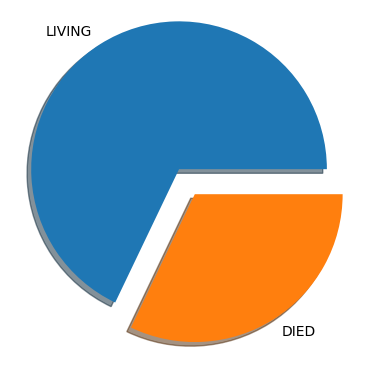

In [7]:
len_live=len(data['DEATH_EVENT'][data.DEATH_EVENT==0])
len_death=len(data['DEATH_EVENT'][data.DEATH_EVENT==1])

arr=np.array([len_live,len_death])
labels=['LIVING','DIED']

print(len_live)
print(len_death)

plt.pie(arr,labels=labels,explode=[0.2,0],shadow=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


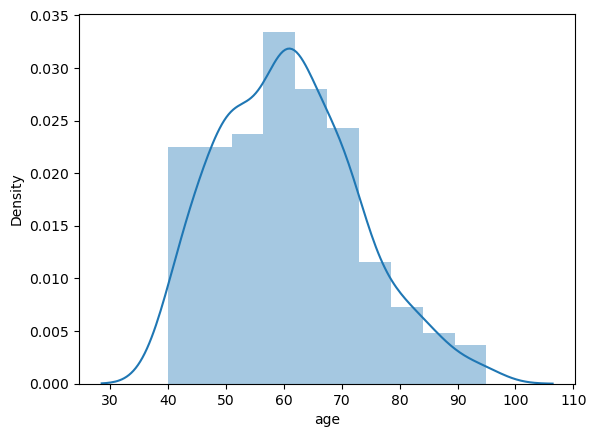

In [8]:
sns.distplot(data['age'])
plt.show()

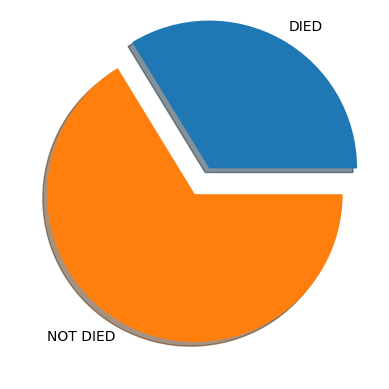

Total no. of died cases,  85
Total no. of not died cases,  167


In [9]:
age_above_50_not_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]  

len_died = len(age_above_50_died) 
len_not_died = len(age_above_50_not_died) 

arr1 = [len_died, len_not_died] 
labels = ['DIED', 'NOT DIED'] 

plt.pie(arr1, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

print ("Total no. of died cases, ", len_died) 
print("Total no. of not died cases, ", len_not_died)

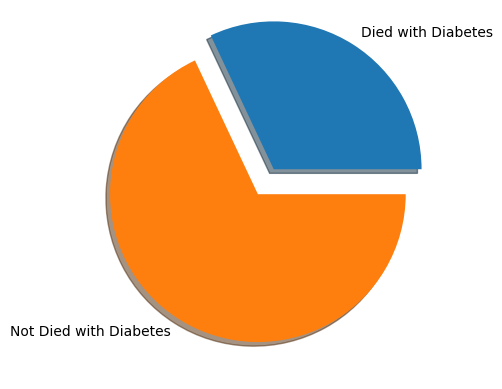

In [10]:
patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 0] 
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1) 
len_d_alive = len(patient_nhave_diabetes_0) 

arr2 = [len_d_died,len_d_alive] 
labels = ['Died with Diabetes', "Not Died with Diabetes"] 
plt.pie(arr2, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

<AxesSubplot:>

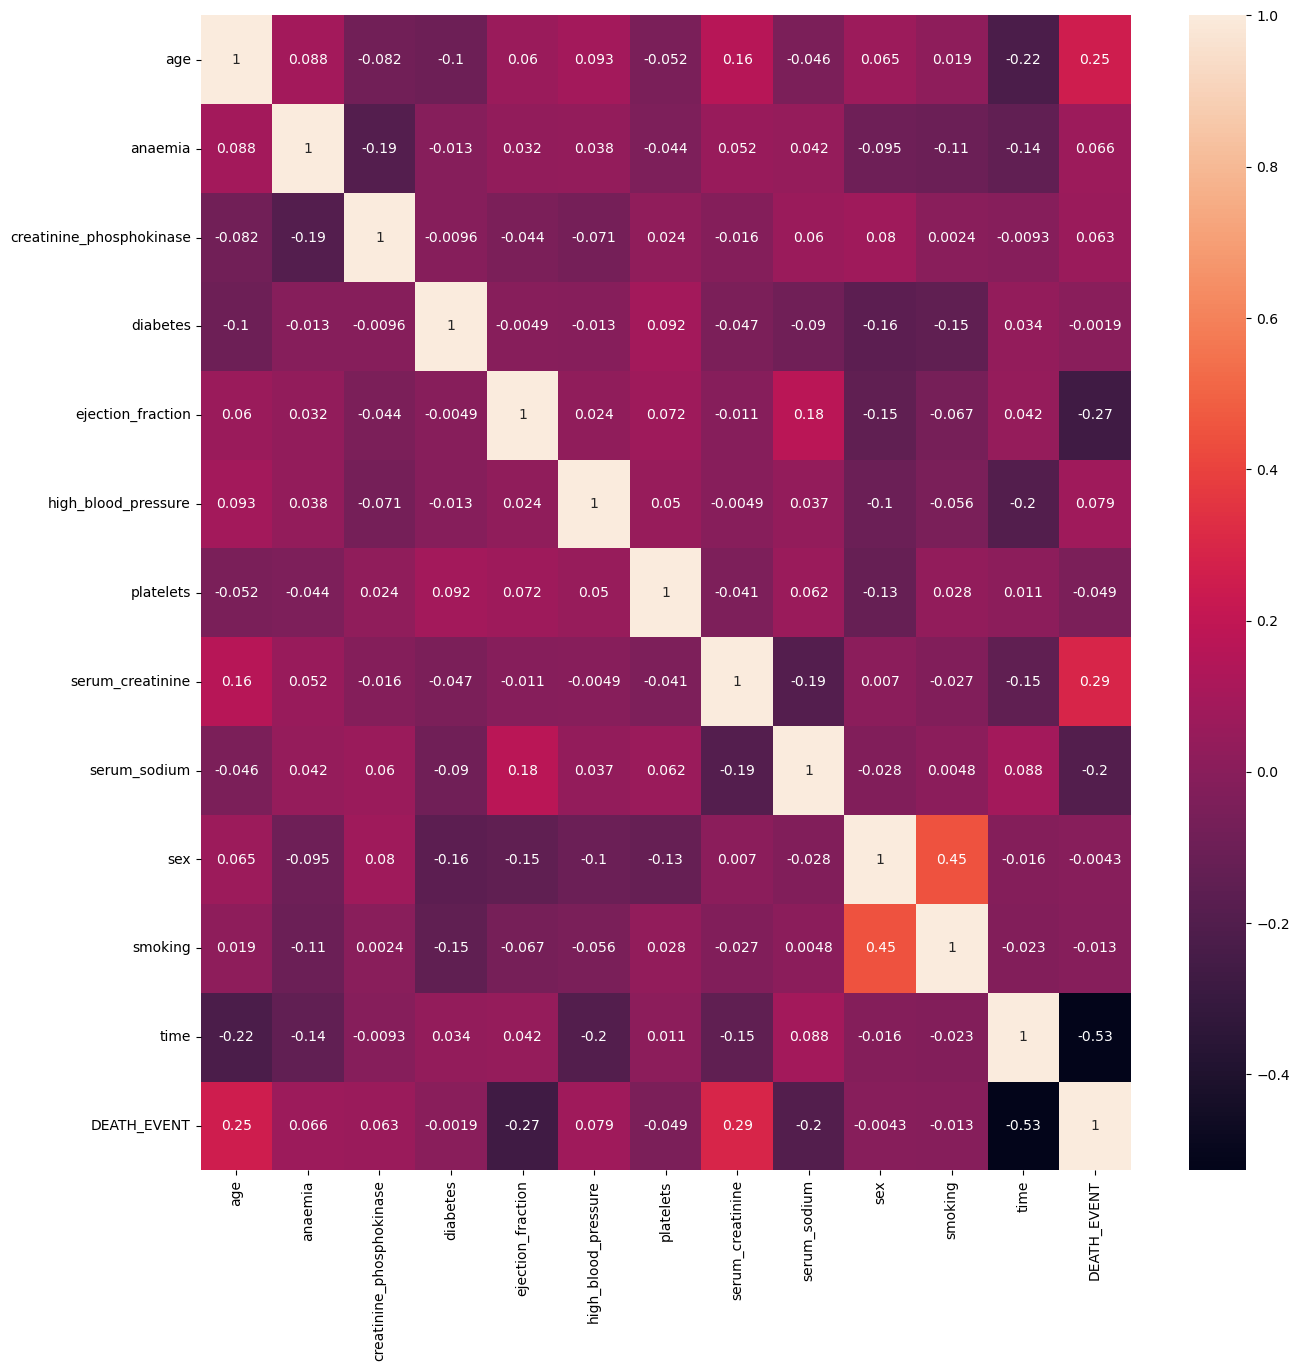

In [11]:
corr = data.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 

In [12]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [13]:
from sklearn.model_selection import train_test_split 
x=data.drop('DEATH_EVENT',axis=1)
y=data["DEATH_EVENT"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=41) 
print("Shape of the X_train", x_train.shape) 
print("Shape of the y_train", y_train.shape) 
print("Shape of the X_test", x_test.shape) 
print("Shape of the y_test", y_test.shape) 

Shape of the X_train (209, 12)
Shape of the y_train (209,)
Shape of the X_test (90, 12)
Shape of the y_test (90,)


In [14]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)
#     print(X_int,'dkdkdkkdkd')
    for i in range(m):
        
        feature_i_name = features[i]
        
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, m):
            
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] =  feature_i_data * feature_j_data
        
    return X_int 


x_train_mod = add_interactions(x_train) 
x_test_mod  = add_interactions(x_test)
x_test_mod.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_x_serum_sodium,serum_creatinine_x_sex,serum_creatinine_x_smoking,serum_creatinine_x_time,serum_sodium_x_sex,serum_sodium_x_smoking,serum_sodium_x_time,sex_x_smoking,sex_x_time,smoking_x_time
196,45.0,0,582,1,38,1,263358.03,1.18,137,0,...,161.66,0.0,0.0,218.3,0,0,25345,0,0,0
51,53.0,1,91,0,20,1,418000.00,1.40,139,0,...,194.60,0.0,0.0,60.2,0,0,5977,0,0,0
294,62.0,0,61,1,38,1,155000.00,1.10,143,1,...,157.30,1.1,1.1,297.0,143,143,38610,1,270,270
192,50.0,1,121,1,40,0,260000.00,0.70,130,1,...,91.00,0.7,0.0,122.5,130,0,22750,0,175,0
150,72.0,0,233,0,45,1,235000.00,2.50,135,0,...,337.50,0.0,0.0,287.5,0,0,15525,0,0,0


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

In [16]:
# building logistic regression model as a baseline model 

from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression(max_iter=1000) 
lr_clf.fit(x_train, y_train) 

lr_clf_pred = lr_clf.predict(x_test) 

In [17]:
y_pred=lr_clf.predict(x_test)
evaluating_model(y_test,y_pred)

Accuracy Score:-  0.7555555555555555
Precision Score:-  0.6666666666666666
Recall Score:-  0.5806451612903226
Confusion Matrix:- 
 [[50  9]
 [13 18]]


In [18]:
# building logistic regression with StandardScaler  

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression()) 
lr_clf_pip.fit(x_train, y_train) 

y_pred1 = lr_clf_pip.predict(x_test)
evaluating_model(y_test,y_pred1)

Accuracy Score:-  0.7888888888888889
Precision Score:-  0.75
Recall Score:-  0.5806451612903226
Confusion Matrix:- 
 [[53  6]
 [13 18]]


In [19]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [21]:
svc = SVC(C = 1, gamma = 0.0001) 
svc.fit(x_train, y_train) 
y_pred2 = svc.predict(x_test) 
evaluating_model(y_test, y_pred2)

Accuracy Score:-  0.6777777777777778
Precision Score:-  1.0
Recall Score:-  0.06451612903225806
Confusion Matrix:- 
 [[59  0]
 [29  2]]


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.852
Test score: 0.822


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

In [23]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds_clf.fit(x_train, y_train) 
pred4 = ds_clf.predict(x_test) 
evaluating_model(y_test, pred4)

Accuracy Score:-  0.6555555555555556
Precision Score:-  0.0
Recall Score:-  0.0
Confusion Matrix:- 
 [[59  0]
 [31  0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))

Training score: 0.871
Test score: 0.822


RandomForestClassifier(max_depth=4, max_features=0.6, min_samples_leaf=10,
                       random_state=2)

In [25]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2) 
rf_clf.fit(x_train, y_train)  
pred5 = rf_clf.predict(x_test) 
evaluating_model(y_test, pred5)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.7916666666666666
Recall Score:-  0.6129032258064516
Confusion Matrix:- 
 [[54  5]
 [12 19]]


In [26]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(x_test, y_test)]

xgb1.fit(x_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.64500
[1]	validation_0-logloss:0.60578
[2]	validation_0-logloss:0.57380
[3]	validation_0-logloss:0.55263
[4]	validation_0-logloss:0.53106
[5]	validation_0-logloss:0.50884
[6]	validation_0-logloss:0.49940
[7]	validation_0-logloss:0.48311
[8]	validation_0-logloss:0.47279
[9]	validation_0-logloss:0.46327
[10]	validation_0-logloss:0.45996
[11]	validation_0-logloss:0.45326
[12]	validation_0-logloss:0.45457
[13]	validation_0-logloss:0.44916
[14]	validation_0-logloss:0.44491
[15]	validation_0-logloss:0.44249
[16]	validation_0-logloss:0.44543
[17]	validation_0-logloss:0.44274
[18]	validation_0-logloss:0.44365
[19]	validation_0-logloss:0.44723
[20]	validation_0-logloss:0.44667
[21]	validation_0-logloss:0.44730
[22]	validation_0-logloss:0.44621
[23]	validation_0-logloss:0.45144
[24]	validation_0-logloss:0.45517
[25]	validation_0-logloss:0.45960


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [28]:
pred6 = xgb1.predict(x_test) 
evaluating_model(y_test, pred6)

Accuracy Score:-  0.8333333333333334
Precision Score:-  0.7857142857142857
Recall Score:-  0.7096774193548387
Confusion Matrix:- 
 [[53  6]
 [ 9 22]]


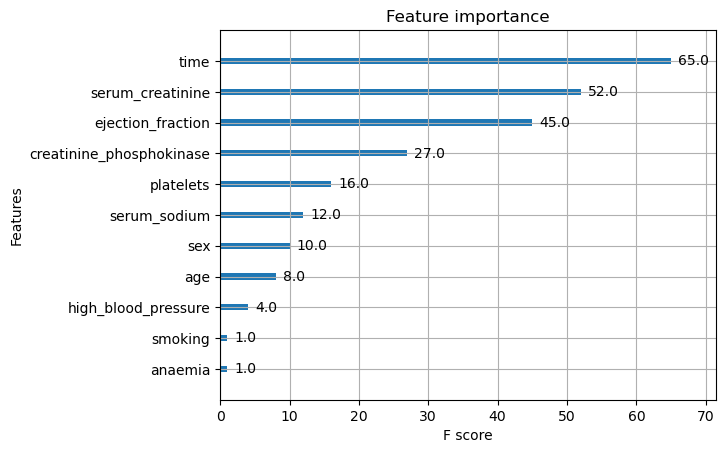

In [29]:
from xgboost import plot_importance
# xgb.feature_importances_ 
plot_importance(xgb1)
plt.show()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
gbdt.fit(x_train, y_train) 

pred_gdbt = gbdt.predict(x_test) 
evaluating_model(y_test, pred_gdbt)

Accuracy Score:-  0.8
Precision Score:-  0.76
Recall Score:-  0.6129032258064516
Confusion Matrix:- 
 [[53  6]
 [12 19]]


In [32]:
# we will choose XGboost 

import joblib 
joblib.dump(xgb1, 'model.pkl') 
model = joblib.load('model.pkl' ) 
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)